In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
wine_data = pd.read_csv("datasets/wine_quality.csv")

wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
x = wine_data.drop(["quality"], axis = 1)

target_names = wine_data["quality"].unique()

target_names

array([6, 5, 7, 8, 4, 3, 9])

In [5]:
y = wine_data["quality"].to_numpy()

y.shape

(4898,)

Text(0, 0.5, 'free sulfur dioxide')

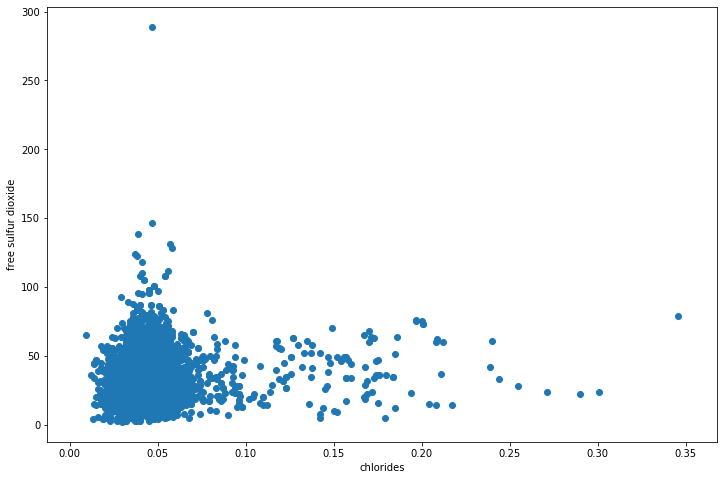

In [6]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(wine_data["chlorides"], wine_data["free sulfur dioxide"])

plt.xlabel("chlorides")
plt.ylabel("free sulfur dioxide")

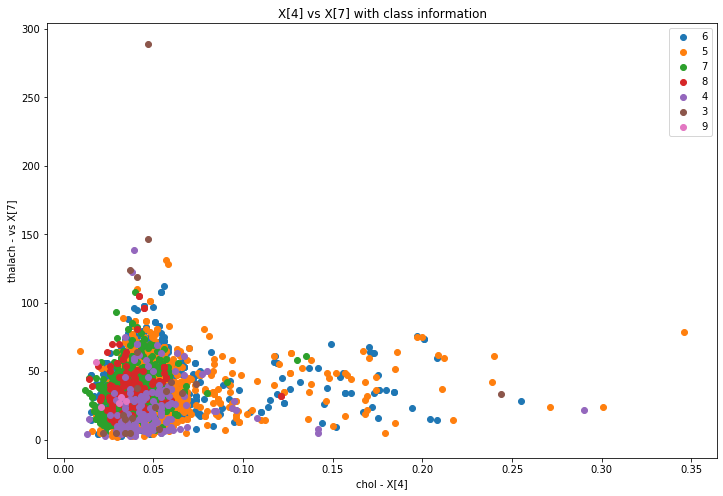

In [7]:
colors = ["C1", "C2", "C3", "C4", "C5", "C6", "C7"]

fig, ax = plt.subplots(figsize = (12, 8))

wine_data_array = np.array(wine_data)

for c, i, target_name in zip(colors, [6, 5, 7, 8, 4, 3, 9], target_names):
    
    plt.scatter(wine_data_array[y == i, 4], wine_data_array[y == i, 5], label = target_name)
    
plt.title("X[4] vs X[7] with class information")
plt.xlabel("chol - X[4]")
plt.ylabel("thalach - vs X[7]")

plt.legend()
plt.show()

In [8]:
lda = LDA(n_components = 2)

x_new = lda.fit_transform(x, y)

In [9]:
lda.explained_variance_ratio_

array([0.83120809, 0.11348134])

In [10]:
sum(lda.explained_variance_ratio_)

0.9446894307284069

In [11]:
x_new = pd.DataFrame(x_new)

x_new.head()

,0,1
0,-0.870520,1.514632
1,-1.677604,-0.490273
2,-0.242396,-0.727960
3,-0.260282,0.921401
4,-0.260282,0.921401


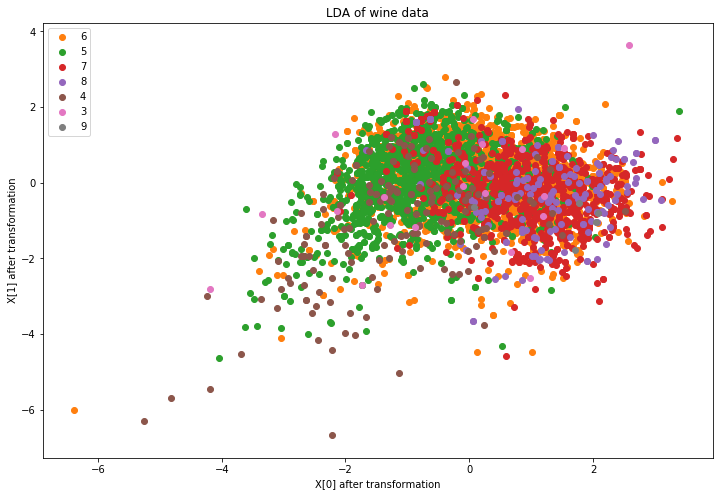

In [12]:
fig, ax = plt.subplots(figsize = (12, 8))

x_new_array = np.array(x_new)

for c, i, target_name in zip(colors, [6, 5, 7, 8, 4, 3, 9], target_names):
    
    plt.scatter(x_new_array[y == i, 0], x_new_array[y == i, 1], c = c, label = target_name)
    
plt.title("LDA of wine data")

plt.xlabel("X[0] after transformation")
plt.ylabel("X[1] after transformation")

plt.legend()
plt.show()

In [13]:
x_new.corr()

,0,1
0,1.000000e+00,5.693007e-16
1,5.693007e-16,1.000000e+00
